In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time_steps = 1000
arm_distribution = {}
no_of_arms = 10

In [3]:
optimal_action = -1
maxi = -1e9
for i in range(10):
   q_true =  np.random.normal(4, 1)
   if(q_true > maxi):
      maxi = q_true
      optimal_action = i
   arm_distribution[i] = (q_true, 1)

In [4]:
print(optimal_action)
print(arm_distribution)

0
{0: (5.912958436093575, 1), 1: (4.452625890944195, 1), 2: (5.334685960291441, 1), 3: (5.061079974469038, 1), 4: (5.3553120853183165, 1), 5: (1.5889084778608633, 1), 6: (4.6534196523901725, 1), 7: (4.307487042895465, 1), 8: (2.180565079369431, 1), 9: (2.631151579257204, 1)}


In [5]:
def gradient_bandit_algo(alpha, time_steps, no_of_arms):
    action_prefrences = np.zeros(no_of_arms)
    average_reward = 0
    pie_of_actions = []
    action_sequence = []
    for t in range(1, time_steps+1):
        pie_of_actions = np.exp(action_prefrences)/(np.exp(action_prefrences).sum())
        action = np.random.choice(no_of_arms, p=pie_of_actions)
        reward_t = np.random.normal(arm_distribution[action][0], arm_distribution[action][1])
        average_reward = average_reward +  ((reward_t - average_reward)/t)
        if action == optimal_action:
            action_sequence.append(1)
        else:
            action_sequence.append(0)
        for arm_num in range(no_of_arms):
            if arm_num == action:
                action_prefrences[arm_num] =  action_prefrences[arm_num] + alpha*(reward_t-average_reward)*(1 - pie_of_actions[arm_num])
            else:
                action_prefrences[arm_num] =  action_prefrences[arm_num] - alpha*(reward_t-average_reward)*(pie_of_actions[arm_num])
        
    return np.array(action_sequence)

In [6]:
def gradient_bandit_algo_without_baseline(alpha, time_steps, no_of_arms):
    action_prefrences = np.zeros(no_of_arms)
    average_reward = 0
    pie_of_actions = []
    action_sequence = []
    for t in range(1, time_steps+1):
        pie_of_actions = np.exp(action_prefrences)/(np.exp(action_prefrences).sum())
        action = np.random.choice(no_of_arms, p=pie_of_actions)
        reward_t = np.random.normal(arm_distribution[action][0], arm_distribution[action][1])
        if action == optimal_action:
            action_sequence.append(1)
        else:
            action_sequence.append(0)
        for arm_num in range(no_of_arms):
            if arm_num == action:
                action_prefrences[arm_num] =  action_prefrences[arm_num] + alpha*(reward_t)*(1 - pie_of_actions[arm_num])
            else:
                action_prefrences[arm_num] =  action_prefrences[arm_num] - alpha*(reward_t)*(pie_of_actions[arm_num])
        
    return np.array(action_sequence)

In [7]:
def plot_rewards(time_steps, no_of_arms):
    xis = range(1, time_steps+1)
    plt.figure(figsize=(14, 4))
    for alpha in (0.1, 0.4):
        action_2000 = []
        for i in range(2000):
            # print(i)
            action_2000.append(gradient_bandit_algo(alpha, time_steps, no_of_arms))
        np.array(action_2000)
        average_action2000 = 100*np.mean(action_2000, axis= 0)
        plt.plot(xis, average_action2000, label = f'alpha with baseline = {alpha}')
    for alpha in (0.1, 0.4):
        action_2000 = []
        for i in range(2000):
            # print(i)
            action_2000.append(gradient_bandit_algo_without_baseline(alpha, time_steps, no_of_arms))
        np.array(action_2000)
        average_action2000 = 100*np.mean(action_2000, axis= 0)
        plt.plot(xis, average_action2000, label = f'alpha without baseline = {alpha}')
    plt.xlabel('Time Steps')
    plt.ylabel('Optimal action percentage')
    plt.legend()
    plt.show()


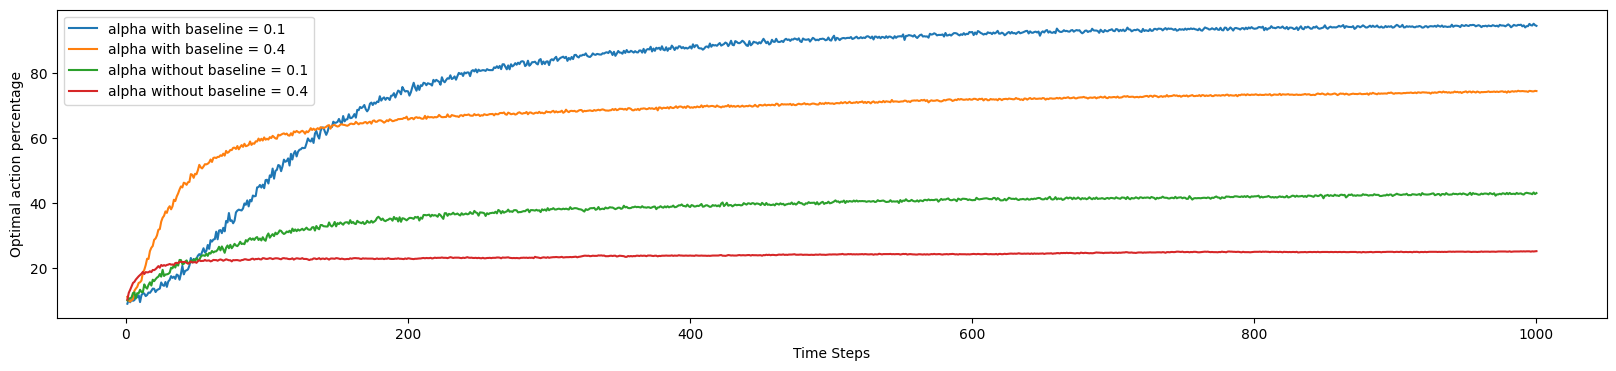

In [8]:
plot_rewards(time_steps, no_of_arms)